In [1]:
pip install jupyter pandas matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.5 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


## 1. Einleitung / Ziel des Projekts 🛒

Dieses Projekt untersucht die wöchentlichen Umsätze von Walmart-Filialen in den USA.  
Neben den Umsatzzahlen werden externe Faktoren wie **Feiertage**, **Temperatur**, **Benzinpreis**,  
sowie **Verbraucherpreisindex (CPI)** und **Arbeitslosenquote** analysiert.

### Ziele:
- Wie verteilen sich die wöchentlichen Umsätze über die Filialen?
- Haben **Feiertage** oder **Wetter** spürbaren Einfluss auf den Umsatz?
- Gibt es Filialen, die **besonders gut oder schlecht performen**?


## 2. Daten laden und Überblick 🧐

Bevor wir tiefer in die Analyse einsteigen, werfen wir einen ersten Blick auf die Struktur der Walmart-Daten:
- Wie viele Zeilen und Spalten gibt es?
- Welche Spalten sind enthalten?
- Gibt es fehlende Werte?


In [2]:
# Bibliotheken importieren
import pandas as pd

# Daten laden
df = pd.read_csv("../data/Walmart.csv")

# Erste 5 Zeilen anzeigen
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 3. Erste Datenprüfung 🧪

Ziel:
- **Größe des Datensatzes ermitteln**
- **Spaltennamen und Datentypen prüfen**
- **Fehlende Werte identifizieren**


In [4]:
# Größe des Datensatzes
df.shape

# Spaltennamen anzeigen
df.columns

# Datentypen und Speicherverbrauch prüfen
df.info()

# Fehlende Werte prüfen
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## 4. Daten bereinigen 🧹

Die Daten sind weitgehend sauber, es gibt **keine fehlenden Werte**.  
Allerdings ist die `Date`-Spalte als `object` (Text) formatiert.  
Für Zeitreihenanalysen müssen wir diese **in ein Datumsformat (datetime)** umwandeln.


In [5]:
# Datumsspalte in datetime-Format umwandeln
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Prüfen, ob es geklappt hat
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## 5. Explorative Datenanalyse (EDA) 🔍

Nun wollen wir die ersten Fragen beantworten:
- **Wie verteilen sich die wöchentlichen Umsätze?**
- **Welche Filialen haben die höchsten Umsätze?**
- **Wie unterscheiden sich die Umsätze zwischen Feiertags- und Normalwochen?**


### 5.1 Umsatzverteilung 📊

Wie verteilen sich die wöchentlichen Umsätze über alle Filialen hinweg?  
Wir visualisieren die Verteilung der `Weekly_Sales`, um **Ausreißer und typische Wertebereiche** zu erkennen.


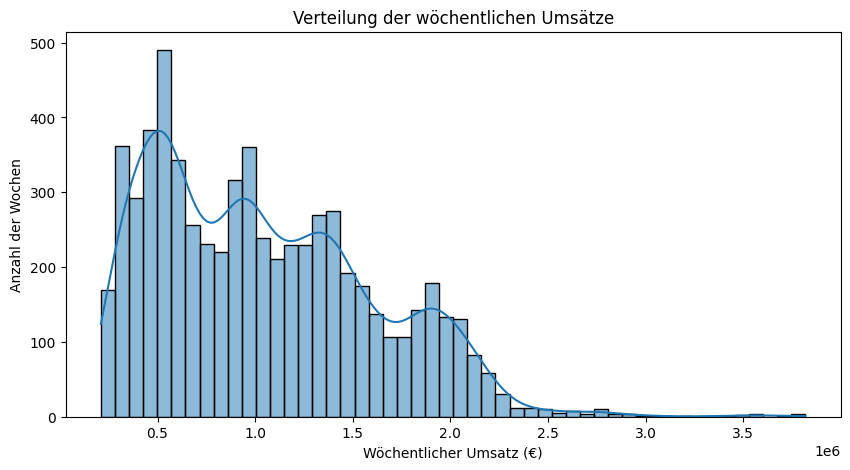

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot-Größe einstellen
plt.figure(figsize=(10, 5))

# Umsatzverteilung plotten
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)

# Achsentitel & Diagrammtitel
plt.xlabel("Wöchentlicher Umsatz (€)")
plt.ylabel("Anzahl der Wochen")
plt.title("Verteilung der wöchentlichen Umsätze")

plt.show()


### 5.2 Top 10 Filialen nach Gesamtumsatz 🏆

Welche Filialen haben den höchsten Gesamtumsatz über den gesamten Zeitraum?  
Dazu gruppieren wir die Umsätze nach `Store` und berechnen die Summe.


In [7]:
# Top 10 Stores nach Gesamtumsatz
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

# Ausgabe der Top 10
top_stores


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

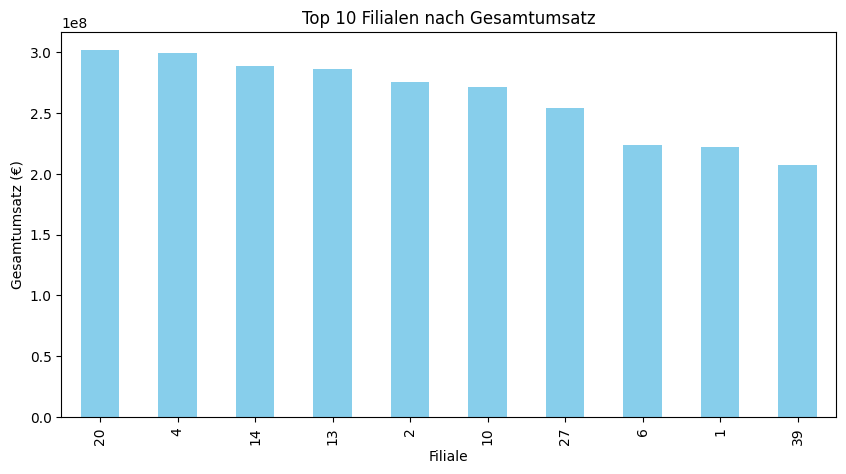

In [8]:
# Visualisierung der Top 10 Stores
plt.figure(figsize=(10, 5))
top_stores.plot(kind='bar', color='skyblue')

plt.title("Top 10 Filialen nach Gesamtumsatz")
plt.xlabel("Filiale")
plt.ylabel("Gesamtumsatz (€)")

plt.show()


## 5.3 Feiertagswochen vs. normale Wochen 🎉📊

In den Walmart-Daten gibt es die Spalte `Holiday_Flag`, die anzeigt,  
ob eine Woche eine Feiertagswoche ist (`1`) oder nicht (`0`).

Wir wollen wissen:
- **Ist der Umsatz in Feiertagswochen höher als in normalen Wochen?**
- **Wie stark ist der Unterschied?**

Hypothese:  
Feiertage wie Weihnachten oder Thanksgiving könnten den Umsatz stark erhöhen.


In [9]:
# Durchschnittlicher Umsatz in Feiertagswochen vs. normalen Wochen
umsatz_vergleich = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Ausgabe des Vergleichs
umsatz_vergleich


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

/var/folders/yy/b7kbx5nj53l4y_x6xkz84z2r0000gn/T/ipykernel_55985/396433555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umsatz_vergleich.index, y=umsatz_vergleich.values, palette='viridis')


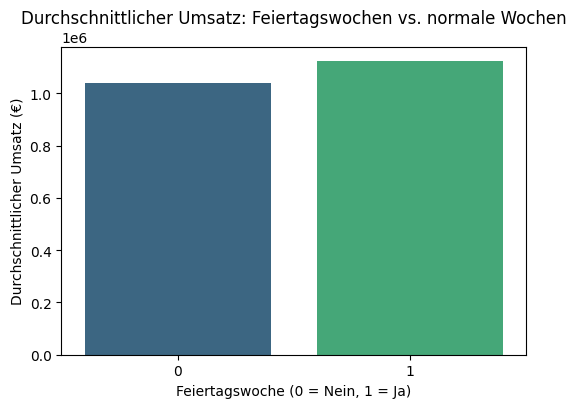

In [10]:
# Visualisierung: Umsatz an Feiertagen vs. normale Wochen
plt.figure(figsize=(6, 4))
sns.barplot(x=umsatz_vergleich.index, y=umsatz_vergleich.values, palette='viridis')

plt.title("Durchschnittlicher Umsatz: Feiertagswochen vs. normale Wochen")
plt.xlabel("Feiertagswoche (0 = Nein, 1 = Ja)")
plt.ylabel("Durchschnittlicher Umsatz (€)")

plt.show()


### Erkenntnisse:
- **Feiertagswochen** haben im Durchschnitt **einen höheren Umsatz als normale Wochen**.
- Der Umsatz in **Feiertagswochen ist ca. 8% höher** als in normalen Wochen.
- Das ist typisch für den Einzelhandel, z. B. **vor Weihnachten, Thanksgiving oder Black Friday**.


## 5.4 Umsatzentwicklung über die Zeit 🕰️📈

Um die **Langzeitentwicklung der Umsätze** zu verstehen,  
schauen wir uns die wöchentlichen Umsätze im Zeitverlauf an.


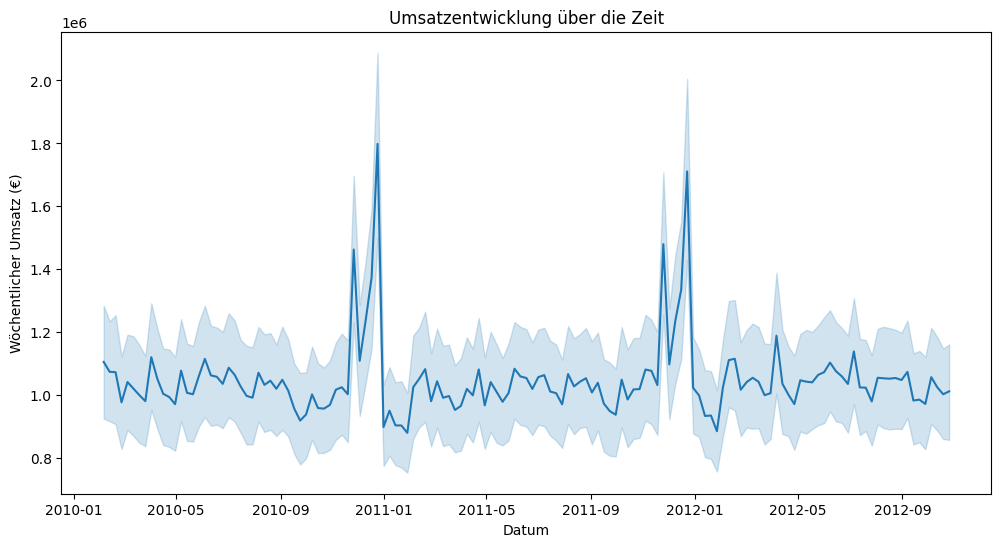

In [11]:
# Visualisierung: Umsatz über die Zeit
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)

plt.title("Umsatzentwicklung über die Zeit")
plt.xlabel("Datum")
plt.ylabel("Wöchentlicher Umsatz (€)")

plt.show()


## 5.5 Externe Faktoren: Temperatur vs. Umsatz 🌡️📊

Wir prüfen, ob die **Temperatur** (z. B. warmes Wetter) einen Einfluss auf den Umsatz hat.  
Die Annahme könnte sein:  
**An wärmeren Tagen gehen weniger Leute in Supermärkte** → Umsatz könnte sinken.


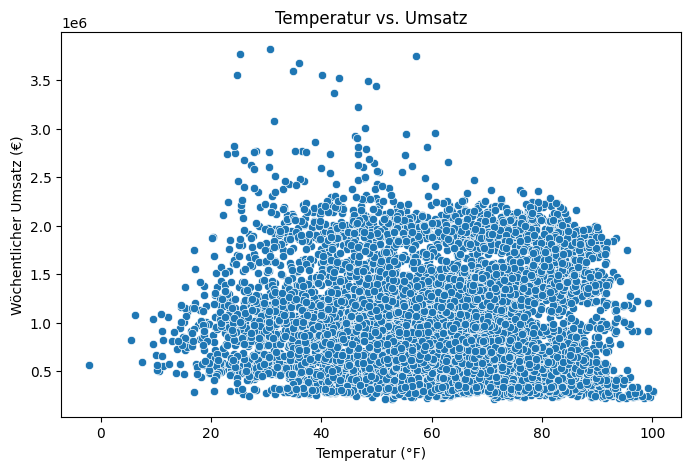

In [12]:
# Scatterplot: Temperatur vs. Umsatz
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)

plt.title("Temperatur vs. Umsatz")
plt.xlabel("Temperatur (°F)")
plt.ylabel("Wöchentlicher Umsatz (€)")

plt.show()


## 5.6 Externe Faktoren: Benzinpreis vs. Umsatz ⛽📊

Wir prüfen, ob der **Benzinpreis** (Fuel_Price) einen Einfluss auf den Umsatz hat.  
Die Hypothese könnte sein:  
**Steigende Benzinpreise könnten Kunden abschrecken**, weite Wege zum Supermarkt zu fahren.


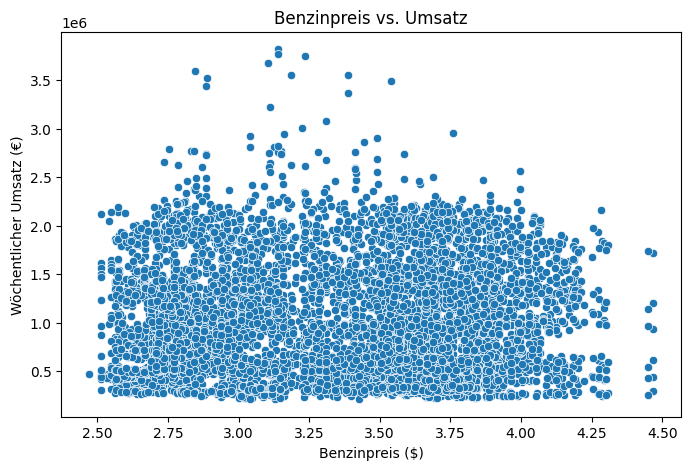

In [13]:
# Scatterplot: Benzinpreis vs. Umsatz
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)

plt.title("Benzinpreis vs. Umsatz")
plt.xlabel("Benzinpreis ($)")
plt.ylabel("Wöchentlicher Umsatz (€)")

plt.show()


## 5.7 Externe Faktoren: Arbeitslosenquote vs. Umsatz 📉📊

Wir prüfen, ob die **Arbeitslosenquote** (Unemployment) einen Einfluss auf den Umsatz hat.  
Die Hypothese könnte sein:  
**Steigende Arbeitslosigkeit könnte Kaufkraft senken** → Umsatz könnte sinken.


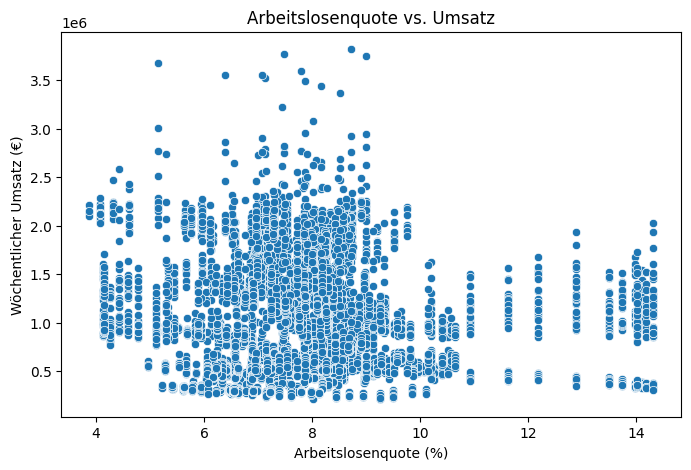

In [14]:
# Scatterplot: Arbeitslosenquote vs. Umsatz
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)

plt.title("Arbeitslosenquote vs. Umsatz")
plt.xlabel("Arbeitslosenquote (%)")
plt.ylabel("Wöchentlicher Umsatz (€)")

plt.show()


## 6. Visualisierungen exportieren 🖼️

Die wichtigsten Diagramme speichern wir als PNG-Dateien,  
damit sie später im GitHub-Repository eingebunden werden können.


In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.xlabel("Wöchentlicher Umsatz (€)")
plt.ylabel("Anzahl der Wochen")
plt.title("Verteilung der wöchentlichen Umsätze")
plt.savefig('../visuals/umsatzverteilung.png')
plt.close()


In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(x=umsatz_vergleich.index, y=umsatz_vergleich.values, palette='viridis')
plt.title("Durchschnittlicher Umsatz: Feiertagswochen vs. normale Wochen")
plt.xlabel("Feiertagswoche (0 = Nein, 1 = Ja)")
plt.ylabel("Durchschnittlicher Umsatz (€)")
plt.savefig('../visuals/feiertage_vs_normal.png')
plt.close()


/var/folders/yy/b7kbx5nj53l4y_x6xkz84z2r0000gn/T/ipykernel_55985/1063897327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umsatz_vergleich.index, y=umsatz_vergleich.values, palette='viridis')


In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title("Umsatzentwicklung über die Zeit")
plt.xlabel("Datum")
plt.ylabel("Wöchentlicher Umsatz (€)")
plt.savefig('../visuals/umsatz_trend.png')
plt.close()


## 7. Kennzahlen zur Umsatzverteilung 🧮

Die Visualisierung der Umsatzverteilung zeigt uns die Form,  
doch für eine genaue Einordnung schauen wir uns auch die **statistischen Kennzahlen** an:
- Minimum, Maximum, Median
- Mittelwert, Standardabweichung


In [18]:
# Statistische Übersicht über Weekly_Sales
df['Weekly_Sales'].describe()


count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [19]:
# Durchschnittlicher Umsatz Feiertagswochen vs. normale Wochen
umsatz_vergleich = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
umsatz_vergleich


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [20]:
df['Holiday_Flag'].value_counts()


Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [21]:
# Erste 5 Zeilen (frühester Zeitraum)
df[['Date', 'Weekly_Sales']].head()

# Letzte 5 Zeilen (neuester Zeitraum)
df[['Date', 'Weekly_Sales']].tail()


,Date,Weekly_Sales
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53
6434,2012-10-26,760281.43


In [22]:
umsatz_pro_woche = df.groupby('Date')['Weekly_Sales'].sum()
umsatz_pro_woche.head()


Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

In [23]:
durchschnitt_umsatz_pro_woche = df.groupby('Date')['Weekly_Sales'].mean()
durchschnitt_umsatz_pro_woche.head()


Date
2010-02-05    1.105572e+06
2010-02-12    1.074148e+06
2010-02-19    1.072822e+06
2010-02-26    9.770794e+05
2010-03-05    1.041588e+06
Name: Weekly_Sales, dtype: float64

In [24]:
# Überblick über Temperatur, Benzinpreis, Arbeitslosigkeit, CPI
df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe()


,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000
mean,60.663782,3.358607,171.578394,7.999151
std,18.444933,0.459020,39.356712,1.875885
min,-2.060000,2.472000,126.064000,3.879000
25%,47.460000,2.933000,131.735000,6.891000
50%,62.670000,3.445000,182.616521,7.874000
75%,74.940000,3.735000,212.743293,8.622000
max,100.140000,4.468000,227.232807,14.313000


## 8. Kennzahlen und Deskriptive Statistiken 📊

Um die Visualisierungen besser einordnen zu können,  
werfen wir einen Blick auf die **wichtigsten Kennzahlen** der Umsatzdaten und Einflussfaktoren in Summe.


In [25]:
# Wichtige Kennzahlen zusammenstellen

# Umsatzverteilung
umsatz_statistik = df['Weekly_Sales'].describe()

# Umsatz Feiertage vs. normale Wochen
umsatz_vergleich = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
wochen_anzahl = df['Holiday_Flag'].value_counts()

# Umsatz pro Woche aggregiert (Gesamtumsatz pro Datum)
umsatz_pro_woche = df.groupby('Date')['Weekly_Sales'].sum()

# Externe Faktoren
externe_faktoren_statistik = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].describe()

# Ergebnisse anzeigen
print("1. Umsatzverteilung (über alle Filialen pro Woche):")
print(umsatz_statistik)

print("\n2. Umsatz Feiertagswochen vs. normale Wochen:")
print(umsatz_vergleich)

print("\nAnzahl der Wochen (Feiertag vs. normal):")
print(wochen_anzahl)

print("\n3. Externe Faktoren (Temperatur, Benzinpreis, CPI, Arbeitslosigkeit):")
print(externe_faktoren_statistik)

print("\n4. Gesamtumsatz pro Woche (erste 5 Wochen):")
print(umsatz_pro_woche.head())


1. Umsatzverteilung (über alle Filialen pro Woche):
count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

2. Umsatz Feiertagswochen vs. normale Wochen:
Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

Anzahl der Wochen (Feiertag vs. normal):
Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

3. Externe Faktoren (Temperatur, Benzinpreis, CPI, Arbeitslosigkeit):
       Temperature   Fuel_Price          CPI  Unemployment
count  6435.000000  6435.000000  6435.000000   6435.000000
mean     60.663782     3.358607   171.578394      7.999151
std      18.444933     0.459020    39.356712      1.875885
min      -2.060000     2.472000   126.064000      3.879000
25%      47.460000     2.933000   131.735000      6.891000
50%      62.670000     3.445000   182.616521      7.874000
75%      74.940000   

## 9. Fazit der Kennzahlen 🧠

### 1️⃣ Umsatzverteilung (pro Filiale/Woche):
- **GROßE Unterschiede zwischen den Filialen**:  
  → **Kleine Filialen ca. 200k €, große bis zu 3,8 Mio €** pro Woche.  
  → **Mittelwert höher als Median** → **Wenige große Filialen treiben den Schnitt hoch**.

### 2️⃣ Feiertagswochen vs. normale Wochen:
- **Feiertagswochen +8% höherer Umsatz** im Vergleich zu normalen Wochen.  
  → **Weihnachten, Black Friday, Thanksgiving** als mögliche Treiber.

### 3️⃣ Externe Faktoren:
- **Kein starker kurzfristiger Einfluss erkennbar** (Streuung in Scatterplots).
- **Arbeitslosenquote recht hoch (~8%)** → Hinweis auf mögliche Rezession (2008/2009).

### 4️⃣ Gesamtumsatz pro Woche (alle Filialen):
- **Ca. 45-50 Mio € pro Woche** → Schwankungen, aber keine extremen Brüche.
